In [1]:
import pandas as pd 
import numpy as np
DF7CompPiero = pd.read_csv('./data/Piero/TestComp.csv', sep=';')
DF7CompMac = pd.read_csv('./data/Mac/Test7Comp.csv', sep=';')
DF7CompPiero.pop('Total')
DF7CompMac.pop('Total')
# Remove last col
DF7CompMac = DF7CompMac.drop(DF7CompMac.columns[[-1]], axis=1)
SequentialPiero = DF7CompPiero[DF7CompPiero['Kind']=="Sequential"].reset_index(drop=True)
SequentialCompPiero = SequentialPiero['Computation']
DF7CompPiero = DF7CompPiero[DF7CompPiero['Kind']!="Sequential"].reset_index(drop=True)
DF7CompPiero['SpeedUp'] = ((np.array(SequentialCompPiero)/DF7CompPiero['Computation']).round(0)).astype(int)

SequentialMac = DF7CompMac[DF7CompMac['Kind']=="Sequential"].reset_index(drop=True)
SequentialCompMac = SequentialMac['Computation']
DF7CompMac = DF7CompMac[DF7CompMac['Kind']!="Sequential"].reset_index(drop=True)
DF7CompMac['SpeedUp'] = ((np.array(SequentialCompMac)/DF7CompMac['Computation']).round(0)).astype(int)
DF7CompMac = DF7CompMac.groupby(['Kind', 'Test File', 'Nw', 'File Size', 'Encoding Size', 'Tasks']).mean().reset_index()
DF7CompMac

,Kind,Test File,Nw,File Size,Encoding Size,Tasks,Computation,SpeedUp
0,FastFlow,enctest7.bin,1,4211840000,2239520001,1,99323376.0,1.0
1,FastFlow,enctest7.bin,2,4211840000,2239520001,32768,52058624.0,2.0
2,FastFlow,enctest7.bin,4,4211840000,2239520001,16384,28649702.0,4.0
3,FastFlow,enctest7.bin,8,4211840000,2239520001,8192,15263683.0,7.0
4,FastFlow,enctest7.bin,10,4211840000,2239520001,8192,20154191.0,6.0
5,ThreadPool,enctest7.bin,1,4211840000,2239520001,1,102384642.0,1.0
6,ThreadPool,enctest7.bin,2,4211840000,2239520001,32768,49297795.0,2.0
7,ThreadPool,enctest7.bin,4,4211840000,2239520001,16384,27323174.0,4.0
8,ThreadPool,enctest7.bin,8,4211840000,2239520001,8192,11823292.0,10.0
9,ThreadPool,enctest7.bin,10,4211840000,2239520001,8192,14871937.0,8.0


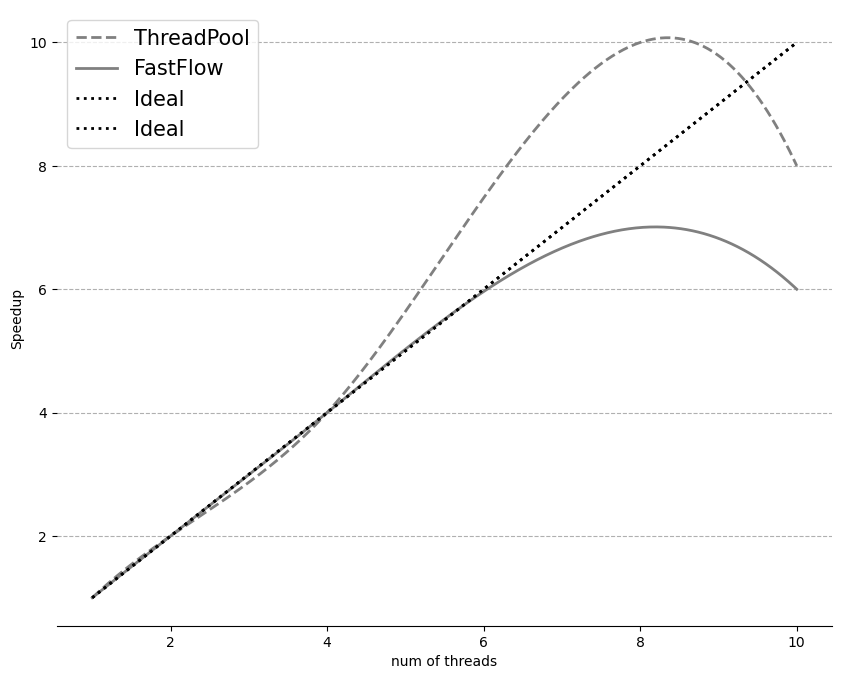

In [15]:
from scipy.interpolate import interp1d
#Plot mac
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Speedup')
ax.set_xlabel('num of threads')

threadpool = DF7CompMac[DF7CompMac['Kind'] == "ThreadPool"]
ff = DF7CompMac[DF7CompMac['Kind'] == "FastFlow"]

cubic_interpolation_model = interp1d(threadpool['Nw'], threadpool['SpeedUp'], kind = "cubic")
cubic_interpolation_modelff = interp1d(ff['Nw'], ff['SpeedUp'], kind = "cubic")
 
# Plotting the Graph
X_tp=np.linspace(threadpool['Nw'].min(), threadpool['Nw'].max(), 500)
Y_tp=cubic_interpolation_model(X_tp)

X_ff=np.linspace(ff['Nw'].min(), ff['Nw'].max(), 500)
Y_ff=cubic_interpolation_modelff(X_ff)


ax.plot(X_tp, Y_tp, label='ThreadPool', color='gray', linestyle='dashed', linewidth=2)
ax.plot(X_ff, Y_ff, label='FastFlow', color='gray', linestyle='solid', linewidth=2)
ax.plot(ff['Nw'], ff['Nw'], label='Ideal', color='black', linestyle='dotted', linewidth=2)
ax.plot(ff['Nw'], ff['Nw'], label='Ideal', color='black', linestyle='dotted', linewidth=2)

ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='dashed')

In [3]:
# DF5CompPiero = pd.read_csv('./data/Piero/Test5Comp.csv', sep=';')
DF5CompMac = pd.read_csv('./data/Mac/T5Comp.csv', sep=';')
# DF5CompPiero.pop('Total')
DF5CompMac.pop('Total')
# Remove last col
DF5CompMac = DF5CompMac.drop(DF5CompMac.columns[[-1]], axis=1)
# DF5CompPiero = DF5CompPiero.drop(DF5CompMac.columns[[-1]], axis=1)

# Sequential5Piero = DF5CompPiero[DF5CompPiero['Kind']=="Sequential"].reset_index(drop=True)
# Sequential5CompPiero = Sequential5Piero['Computation']
# DF5CompPiero = DF5CompPiero[DF5CompPiero['Kind']!="Sequential"].reset_index(drop=True)
# DF5CompPiero['SpeedUp'] = ((np.array(Sequential5CompPiero)/DF5CompPiero['Computation']).round(0)).astype(int)

Sequential5Mac = DF5CompMac[DF5CompMac['Kind']=="Sequential"].reset_index(drop=True)
Sequential5CompMac = Sequential5Mac['Computation']
DF5CompMac = DF5CompMac[DF5CompMac['Kind']!="Sequential"].reset_index(drop=True)
DF5CompMac['SpeedUp'] = ((np.array(Sequential5CompMac)/DF5CompMac['Computation']).round(0)).astype(int)
DF5CompMac = DF5CompMac.groupby(['Kind', 'Test File', 'Nw', 'File Size', 'Encoding Size', 'Tasks']).mean().reset_index()
DF5CompMac

,Kind,Test File,Nw,File Size,Encoding Size,Tasks,Computation,SpeedUp
0,FastFlow,enctest5.bin,1,1052960000,559880001,16384,24530377.0,1.0
1,FastFlow,enctest5.bin,2,1052960000,559880001,8192,12303393.0,2.0
2,FastFlow,enctest5.bin,4,1052960000,559880001,4096,6265984.0,3.0
3,FastFlow,enctest5.bin,6,1052960000,559880001,2048,4342547.0,5.0
4,FastFlow,enctest5.bin,8,1052960000,559880001,2048,3652869.0,6.0
5,FastFlow,enctest5.bin,10,1052960000,559880001,2048,3546969.0,6.0
6,ThreadPool,enctest5.bin,1,1052960000,559880001,16384,23525380.0,1.0
7,ThreadPool,enctest5.bin,2,1052960000,559880001,8192,11812783.0,2.0
8,ThreadPool,enctest5.bin,4,1052960000,559880001,4096,5882179.0,4.0
9,ThreadPool,enctest5.bin,6,1052960000,559880001,2048,3948986.0,6.0


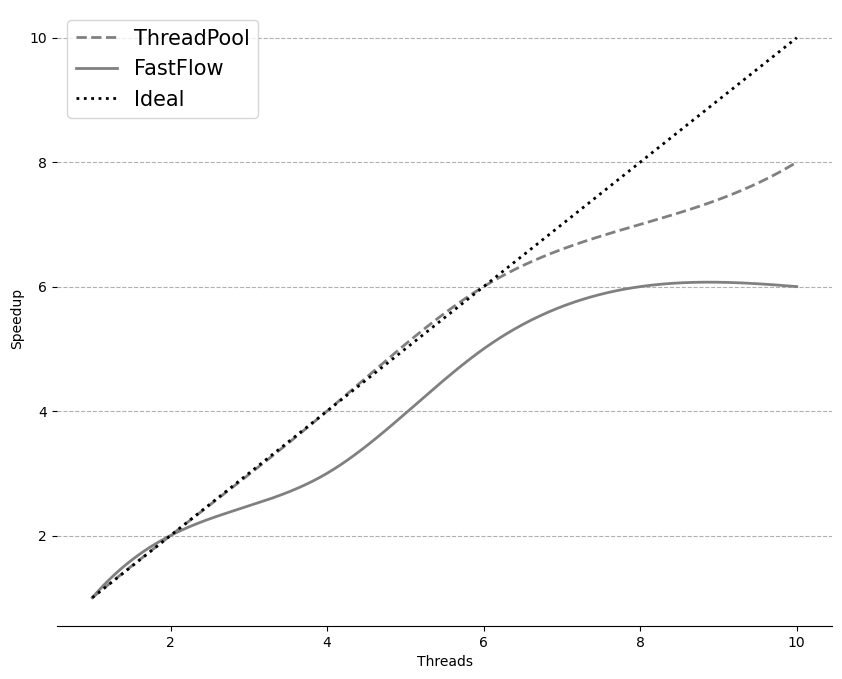

In [13]:
#Plot mac
# import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Speedup')
ax.set_xlabel('Threads')
# sns.set_theme()
threadpool = DF5CompMac[DF5CompMac['Kind'] == "ThreadPool"]
ff = DF5CompMac[DF5CompMac['Kind'] == "FastFlow"]

cubic_interpolation_model = interp1d(threadpool['Nw'], threadpool['SpeedUp'], kind = "cubic")
cubic_interpolation_modelff = interp1d(ff['Nw'], ff['SpeedUp'], kind = "cubic")
 
# Plotting the Graph
X_tp=np.linspace(threadpool['Nw'].min(), threadpool['Nw'].max(), 500)
Y_tp=cubic_interpolation_model(X_tp)

X_ff=np.linspace(ff['Nw'].min(), ff['Nw'].max(), 500)
Y_ff=cubic_interpolation_modelff(X_ff)


ax.plot(X_tp, Y_tp, label='ThreadPool', color='gray', linestyle='dashed', linewidth=2)
ax.plot(X_ff, Y_ff, label='FastFlow', color='gray', linestyle='solid', linewidth=2)
ax.plot(ff['Nw'], ff['Nw'], label='Ideal', color='black', linestyle='dotted', linewidth=2)

ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='dashed')
